# How Much of the World Has Access to the Internet?

## 1. Background 
You work for a policy consulting firm. One of the firm's principals is preparing to give a presentation on the state of internet access in the world. She needs your help answering some questions about internet accessibility across the world.

## 2. The data dictionary

The research team compiled the following tables ([source](https://ourworldindata.org/internet)):

### 2.1 internet table
- "Entity" - The name of the country, region, or group.
- "Code" - Unique id for the country (null for other entities).
- "Year" - Year from 1990 to 2019.
- "Internet_usage" -  The share of the entity's population who have used the internet in the last three months.

### 2.2 people table
- "Entity" - The name of the country, region, or group.
- "Code" - Unique id for the country (null for other entities).
- "Year" - Year from 1990 to 2020.
- "Users" - The number of people who have used the internet in the last three months for that country, region, or group.

### 2.3 broadband table
- "Entity" - The name of the country, region, or group.
- "Code" - Unique id for the country (null for other entities).
- "Year" - Year from 1998 to 2020.
- "Broadband_Subscriptions" - The number of fixed subscriptions to high-speed internet at downstream speeds >= 256 kbit/s for that country, region, or group *(It is obtained by dividing the number of fixed broadband Internet subscribers by the population and then multiplying by 100)*.

_**Acknowledgments**: Max Roser, Hannah Ritchie, and Esteban Ortiz-Ospina (2015) - "Internet." OurWorldInData.org._

## 3. Challenge
Create a report to answer the principal's questions. Include:

1. What are the top 5 countries with the highest internet use (by population share)?
2. How many people had internet access in those countries in 2019?
3. What are the top 5 countries with the highest internet use for each of the following regions: 'Africa Eastern and Southern', 'Africa Western and Central', 'Latin America & Caribbean', 'East Asia & Pacific', 'South Asia', 'North America', 'European Union'?
4. Create a visualization for those five regions' internet usage over time.
5. What are the 5 countries with the most internet users?
6. What is the correlation between internet usage (population share) and broadband subscriptions for 2019?
7. Summarize your findings.

## 4. Load packages and DataFrames

### 4.1 Load packages

Let's start by loading all the necessary Python packages.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid') # Set the style for all the figures

### 4.2 Load DataFrames

In [2]:
internet = pd.read_csv('data/internet.csv')
internet.tail()

,Entity,Code,Year,Internet_Usage
7084,Zimbabwe,ZWE,2013,15.500000
7085,Zimbabwe,ZWE,2014,16.364740
7086,Zimbabwe,ZWE,2015,22.742818
7087,Zimbabwe,ZWE,2016,23.119989
7088,Zimbabwe,ZWE,2017,27.055488


In [3]:
people = pd.read_csv('data/people.csv')
people.tail()

,Entity,Code,Year,Users
6374,Zimbabwe,ZWE,2016,3341464
6375,Zimbabwe,ZWE,2017,3599269
6376,Zimbabwe,ZWE,2018,3763048
6377,Zimbabwe,ZWE,2019,3854006
6378,Zimbabwe,ZWE,2020,4591211


In [4]:
broadband = pd.read_csv('data/broadband.csv')
broadband.tail()

,Entity,Code,Year,Broadband_Subscriptions
3883,Zimbabwe,ZWE,2016,1.217633
3884,Zimbabwe,ZWE,2017,1.315694
3885,Zimbabwe,ZWE,2018,1.406322
3886,Zimbabwe,ZWE,2019,1.395818
3887,Zimbabwe,ZWE,2020,1.368916


## 5. Data wrangling

### 5.1 The internet DataFrame

In [5]:
print(f"The internet DataFrame has {internet.shape[0]}, and {internet.shape[1]} columns")

The internet DataFrame has 7089, and 4 columns


- The `Code` column is the only column in the DataFrame that has null values.

In [6]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7089 entries, 0 to 7088
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Entity          7089 non-null   object 
 1   Code            5761 non-null   object 
 2   Year            7089 non-null   int64  
 3   Internet_Usage  7089 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 221.7+ KB


- There are 1,328 null values in the `Code` column.

In [7]:
internet.isna().sum()

Entity               0
Code              1328
Year                 0
Internet_Usage       0
dtype: int64

- There are not duplicate rows in the DataFrame.

In [8]:
internet.duplicated().sum()

0

### 5.2 The people DataFrame

In [9]:
print(f"The internet DataFrame has {people.shape[0]}, and {people.shape[1]} columns")

The internet DataFrame has 6379, and 4 columns


- The `Code` column is the only column in the DataFrame that has null values.
- The data types for the columns are correct.

In [10]:
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6379 entries, 0 to 6378
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Entity  6379 non-null   object
 1   Code    6072 non-null   object
 2   Year    6379 non-null   int64 
 3   Users   6379 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 199.5+ KB


- There are 307 null values in the `Code` column.

In [11]:
people.isna().sum()

Entity      0
Code      307
Year        0
Users       0
dtype: int64

- There are not duplicate rows in the DataFrame.

In [12]:
people.duplicated().sum()

0

### 5.3 The broadband DataFrame

In [13]:
print(f"The internet DataFrame has {broadband.shape[0]}, and {broadband.shape[1]} columns")

The internet DataFrame has 3888, and 4 columns


- The `Code` column is the only column in the DataFrame that has null values.
- The data types for the columns are correct.

In [14]:
broadband.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3888 entries, 0 to 3887
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Entity                   3888 non-null   object 
 1   Code                     3617 non-null   object 
 2   Year                     3888 non-null   int64  
 3   Broadband_Subscriptions  3888 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 121.6+ KB


- There are 271 null values in the `Code` column.

In [15]:
broadband.isna().sum()

Entity                       0
Code                       271
Year                         0
Broadband_Subscriptions      0
dtype: int64

- There are not duplicate rows in the DataFrame.

In [16]:
broadband.duplicated().sum()

0

### 5.4 Dealing with null values

- The null values in the `Code` column are regions (e.g. Europe & Central Asia), country members of organizations (e.g. OECD), or a group of countries under certain characteristics (e.g. High income countries).
- There are not single countries in the null values.

In [17]:
internet.loc[
    (internet['Code'].isna()),
    'Entity'
].value_counts().head(n=10)

Euro area                                        30
Central Europe and the Baltics                   30
European Union                                   30
Europe & Central Asia (excluding high income)    30
Europe & Central Asia (IDA & IBRD)               30
Europe & Central Asia                            30
OECD members                                     29
High income                                      29
Post-demographic dividend                        29
Latin America & Caribbean                        29
Name: Entity, dtype: int64

- New variables are created to filter out the null values in the `Code` column. 
- The entity `World` (code = OWID_WRL) are also considered in the new variables.

In [18]:
only_countries_internet = ~(internet['Code'].isnull()) & (internet['Entity'] != 'World')
only_countries_people = ~(people['Code'].isnull()) & (people['Entity'] != 'World')
only_countries_broadband = ~(broadband['Code'].isnull()) & (broadband['Entity'] != 'World')

- The **df_country_internet** contains data from the internet DataFrame, but only for countries.
    - The DataFrame index is reset.

In [19]:
df_country_internet = internet.loc[
    only_countries_internet
].sort_values(by=['Entity', 'Year']).reset_index(drop=True)

In [20]:
df_country_internet.value_counts(subset='Entity')

Entity
Hong Kong                   30
Hungary                     30
Netherlands                 30
Spain                       30
South Korea                 30
                            ..
Turks and Caicos Islands     6
American Samoa               6
South Sudan                  5
Curacao                      2
Kosovo                       2
Length: 213, dtype: int64

- The **df_country_people** and **df_country_broadband** contains data from the **people** and **broadband** DataFrame respectively, but only for countries.
    - The DataFrames index are reset.

In [21]:
df_country_people = people.loc[
    only_countries_people
].sort_values(by=['Entity', 'Year']).reset_index(drop=True)

In [22]:
df_country_broadband = broadband.loc[
    only_countries_broadband
].sort_values(by=['Entity', 'Year']).reset_index(drop=True)

### 5.5 Creating the regions

- To create the regions for the DataFrames, a dictionary is needed to map the values from the DataFrames to the actual regions.
    - The dictionary was created based on the information from the World Bank official web site. ([source](https://data.worldbank.org/country))

In [23]:
label_regions = {'ABW': 'Latin America & Caribbean',
 'AFG': 'South Asia',
 'AGO': 'Africa Eastern and Southern',
 'ALB': 'European Union',
 'AND': 'European Union',
 'ARE': 'Africa Western and Central',
 'ARG': 'Latin America & Caribbean',
 'ARM': 'European Union',
 'ASM': 'East Asia & Pacific',
 'ATG': 'Latin America & Caribbean',
 'AUS': 'East Asia & Pacific',
 'AUT': 'European Union',
 'AZE': 'European Union',
 'BDI': 'Africa Eastern and Southern',
 'BEL': 'European Union',
 'BEN': 'Africa Eastern and Southern',
 'BFA': 'Africa Eastern and Southern',
 'BGD': 'South Asia',
 'BGR': 'European Union',
 'BHR': 'Africa Western and Central',
 'BHS': 'Latin America & Caribbean',
 'BIH': 'European Union',
 'BLR': 'European Union',
 'BLZ': 'Latin America & Caribbean',
 'BMU': 'North America',
 'BOL': 'Latin America & Caribbean',
 'BRA': 'Latin America & Caribbean',
 'BRB': 'Latin America & Caribbean',
 'BRN': 'East Asia & Pacific',
 'BTN': 'South Asia',
 'BWA': 'Africa Eastern and Southern',
 'CAF': 'Africa Eastern and Southern',
 'CAN': 'North America',
 'CHE': 'European Union',
 'CHL': 'Latin America & Caribbean',
 'CHN': 'East Asia & Pacific',
 'CIV': 'Africa Eastern and Southern',
 'CMR': 'Africa Eastern and Southern',
 'COD': 'Africa Eastern and Southern',
 'COG': 'Africa Eastern and Southern',
 'COL': 'Latin America & Caribbean',
 'COM': 'Africa Eastern and Southern',
 'CPV': 'Africa Eastern and Southern',
 'CRI': 'Latin America & Caribbean',
 'CUB': 'Latin America & Caribbean',
 'CUW': 'Latin America & Caribbean',
 'CYM': 'Latin America & Caribbean',
 'CYP': 'European Union',
 'CZE': 'European Union',
 'DEU': 'European Union',
 'DJI': 'Africa Western and Central',
 'DMA': 'Latin America & Caribbean',
 'DNK': 'European Union',
 'DOM': 'Latin America & Caribbean',
 'DZA': 'Africa Western and Central',
 'ECU': 'Latin America & Caribbean',
 'EGY': 'Africa Western and Central',
 'ERI': 'Africa Eastern and Southern',
 'ESP': 'European Union',
 'EST': 'European Union',
 'ETH': 'Africa Eastern and Southern',
 'FIN': 'European Union',
 'FJI': 'East Asia & Pacific',
 'FRA': 'European Union',
 'FRO': 'European Union',
 'FSM': 'East Asia & Pacific',
 'GAB': 'Africa Eastern and Southern',
 'GBR': 'European Union',
 'GEO': 'European Union',
 'GHA': 'Africa Eastern and Southern',
 'GIB': 'European Union',
 'GIN': 'Africa Eastern and Southern',
 'GMB': 'Africa Eastern and Southern',
 'GNB': 'Africa Eastern and Southern',
 'GNQ': 'Africa Eastern and Southern',
 'GRC': 'European Union',
 'GRD': 'Latin America & Caribbean',
 'GRL': 'European Union',
 'GTM': 'Latin America & Caribbean',
 'GUM': 'East Asia & Pacific',
 'GUY': 'Latin America & Caribbean',
 'HKG': 'East Asia & Pacific',
 'HND': 'Latin America & Caribbean',
 'HRV': 'European Union',
 'HTI': 'Latin America & Caribbean',
 'HUN': 'European Union',
 'IDN': 'East Asia & Pacific',
 'IND': 'South Asia',
 'IRL': 'European Union',
 'IRN': 'Africa Western and Central',
 'IRQ': 'Africa Western and Central',
 'ISL': 'European Union',
 'ISR': 'Africa Western and Central',
 'ITA': 'European Union',
 'JAM': 'Latin America & Caribbean',
 'JOR': 'Africa Western and Central',
 'JPN': 'East Asia & Pacific',
 'KAZ': 'European Union',
 'KEN': 'Africa Eastern and Southern',
 'KGZ': 'European Union',
 'KHM': 'East Asia & Pacific',
 'KIR': 'East Asia & Pacific',
 'KNA': 'Latin America & Caribbean',
 'KOR': 'East Asia & Pacific',
 'KWT': 'Africa Western and Central',
 'LAO': 'East Asia & Pacific',
 'LBN': 'Africa Western and Central',
 'LBR': 'Africa Eastern and Southern',
 'LBY': 'Africa Western and Central',
 'LCA': 'Latin America & Caribbean',
 'LIE': 'European Union',
 'LKA': 'South Asia',
 'LSO': 'Africa Eastern and Southern',
 'LTU': 'European Union',
 'LUX': 'European Union',
 'LVA': 'European Union',
 'MAC': 'East Asia & Pacific',
 'MAR': 'Africa Western and Central',
 'MCO': 'European Union',
 'MDA': 'European Union',
 'MDG': 'Africa Eastern and Southern',
 'MDV': 'South Asia',
 'MEX': 'Latin America & Caribbean',
 'MHL': 'East Asia & Pacific',
 'MKD': 'European Union',
 'MLI': 'Africa Eastern and Southern',
 'MLT': 'Africa Western and Central',
 'MMR': 'East Asia & Pacific',
 'MNE': 'European Union',
 'MNG': 'East Asia & Pacific',
 'MNP': 'East Asia & Pacific',
 'MOZ': 'Africa Eastern and Southern',
 'MRT': 'Africa Eastern and Southern',
 'MUS': 'Africa Eastern and Southern',
 'MWI': 'Africa Eastern and Southern',
 'MYS': 'East Asia & Pacific',
 'NAM': 'Africa Eastern and Southern',
 'NCL': 'East Asia & Pacific',
 'NER': 'Africa Eastern and Southern',
 'NGA': 'Africa Eastern and Southern',
 'NIC': 'Latin America & Caribbean',
 'NLD': 'European Union',
 'NOR': 'European Union',
 'NPL': 'South Asia',
 'NRU': 'East Asia & Pacific',
 'NZL': 'East Asia & Pacific',
 'OMN': 'Africa Western and Central',
 'PAK': 'South Asia',
 'PAN': 'Latin America & Caribbean',
 'PER': 'Latin America & Caribbean',
 'PHL': 'East Asia & Pacific',
 'PLW': 'East Asia & Pacific',
 'PNG': 'East Asia & Pacific',
 'POL': 'European Union',
 'PRI': 'Latin America & Caribbean',
 'PRK': 'East Asia & Pacific',
 'PRT': 'European Union',
 'PRY': 'Latin America & Caribbean',
 'PSE': 'Africa Western and Central',
 'PYF': 'East Asia & Pacific',
 'QAT': 'Africa Western and Central',
 'ROU': 'European Union',
 'RUS': 'European Union',
 'RWA': 'Africa Eastern and Southern',
 'SAU': 'Africa Western and Central',
 'SDN': 'Africa Eastern and Southern',
 'SEN': 'Africa Eastern and Southern',
 'SGP': 'East Asia & Pacific',
 'SLB': 'East Asia & Pacific',
 'SLE': 'Africa Eastern and Southern',
 'SLV': 'Latin America & Caribbean',
 'SMR': 'European Union',
 'SOM': 'Africa Eastern and Southern',
 'SRB': 'European Union',
 'SSD': 'Africa Eastern and Southern',
 'STP': 'Africa Eastern and Southern',
 'SUR': 'Latin America & Caribbean',
 'SVK': 'European Union',
 'SVN': 'European Union',
 'SWE': 'European Union',
 'SWZ': 'Africa Eastern and Southern',
 'SYC': 'Africa Eastern and Southern',
 'SYR': 'Africa Western and Central',
 'TCA': 'Latin America & Caribbean',
 'TCD': 'Africa Eastern and Southern',
 'TGO': 'Africa Eastern and Southern',
 'THA': 'East Asia & Pacific',
 'TJK': 'European Union',
 'TKM': 'European Union',
 'TLS': 'East Asia & Pacific',
 'TON': 'East Asia & Pacific',
 'TTO': 'Latin America & Caribbean',
 'TUN': 'Africa Western and Central',
 'TUR': 'European Union',
 'TUV': 'East Asia & Pacific',
 'TZA': 'Africa Eastern and Southern',
 'UGA': 'Africa Eastern and Southern',
 'UKR': 'European Union',
 'URY': 'Latin America & Caribbean',
 'USA': 'North America',
 'UZB': 'European Union',
 'VCT': 'Latin America & Caribbean',
 'VEN': 'Latin America & Caribbean',
 'VGB': 'Latin America & Caribbean',
 'VIR': 'Latin America & Caribbean',
 'VNM': 'East Asia & Pacific',
 'VUT': 'East Asia & Pacific',
 'WSM': 'East Asia & Pacific',
 'YEM': 'Africa Western and Central',
 'ZAF': 'Africa Eastern and Southern',
 'ZMB': 'Africa Eastern and Southern',
 'ZWE': 'Africa Eastern and Southern',
 'OWID_KOS': 'European Union'
}

- The dictionary is used to create the `Region` column in the **df_country_internet**, **df_country_people** and **df_country_broadband** DataFrames.

In [24]:
# list of the DataFrames
list_df = [df_country_internet, df_country_people, df_country_broadband]

In [25]:
# Create a new column called 'Region' in the DataFrames from the list_df
for df in list_df:
    df['Region'] = df['Code'].map(label_regions)

- All values were matched in the DataFrames.

In [26]:
print('\033[1m', 'Results from the df_country_internet DataFrame:', '\033[0m')
print(df_country_internet.value_counts(subset='Region', dropna=False))

print('\033[1m', '\n Results from the df_country_people DataFrame:', '\033[0m')
print(df_country_people.value_counts(subset='Region', dropna=False))

print('\033[1m', '\n Results from the df_country_broadband DataFrame:', '\033[0m')
print(df_country_broadband.value_counts(subset='Region', dropna=False))

 Results from the df_country_internet DataFrame: 
Region
European Union                 1556
Africa Eastern and Southern    1291
Latin America & Caribbean      1053
East Asia & Pacific             935
Africa Western and Central      601
South Asia                      212
North America                    85
dtype: int64
 
 Results from the df_country_people DataFrame: 
Region
European Union                 1615
Africa Eastern and Southern    1411
Latin America & Caribbean      1116
East Asia & Pacific             977
Africa Western and Central      600
South Asia                      232
North America                    90
dtype: int64
 
 Results from the df_country_broadband DataFrame: 
Region
European Union                 1056
Africa Eastern and Southern     704
Latin America & Caribbean       685
East Asia & Pacific             585
Africa Western and Central      375
South Asia                      133
North America                    59
dtype: int64


### 5.6 Optimize memory usage

- The `Region` columns are strings consisting of only a few different values.
    - Converting such string variables to categorical variables can save some memory.

In [27]:
df_country_internet.nunique()

Entity             213
Code               213
Year                30
Internet_Usage    4202
Region               7
dtype: int64

In [28]:
print(df_country_internet.memory_usage(deep=True))
print('\033[1m' f"\n Total memory usage before conversion:{df_country_internet.memory_usage(deep=True).sum()} (approx 1.25 MB)", '\033[0m' )

Index                128
Entity            376613
Code              343990
Year               45864
Internet_Usage     45864
Region            446363
dtype: int64

 Total memory usage before conversion:1258822 (approx 1.25 MB) 


- The `Region` columns in the **df_country_internet** are converted to a categorical data type.

In [29]:
# Converts the 'Region' column to a data type category
df_country_internet = df_country_internet.assign(
    Region = lambda x: x['Region'].astype('category')
)

In [30]:
print(df_country_internet.memory_usage(deep=True))
print('\033[1m' f"\n Total memory usage after conversion: {df_country_internet.memory_usage(deep=True).sum()} (approx 0,78 MB)\
\n (memory usage is optimized by almost 35%)", '\033[1m')

Index                128
Entity            376613
Code              343990
Year               45864
Internet_Usage     45864
Region              6566
dtype: int64

 Total memory usage after conversion: 819025 (approx 0,78 MB)
 (memory usage is optimized by almost 35%) 


- The same is done for the **df_country_people** and **df_country_broadband** DataFrames.

In [31]:
df_country_people = df_country_people.assign(
    Region = lambda x: x['Region'].astype('category')
)

In [32]:
df_country_broadband = df_country_broadband.assign(
    Region = lambda x: x['Region'].astype('category')
)

In [33]:
print('\033[1m' f"Results from the df_country_people DataFrame:", '\033[0m')
print(df_country_people.memory_usage(deep=True))
print('\033[1m' f"Total memory usage after conversion: {df_country_people.memory_usage(deep=True).sum()}  \
\n From 1.3 MB to 0.87 MB (memory usage is optimized by almost 35%) \n", '\033[0m' )

print('\033[1m' f"Results from the df_country_broadband DataFrame:", '\033[0m')
print(df_country_broadband.memory_usage(deep=True))
print('\033[1m' f"Total memory usage after conversion: {df_country_broadband.memory_usage(deep=True).sum()} \
\n From 0.79 MB to 0.49 MB (memory usage is optimized by almost 35%)", '\033[0m' )

Results from the df_country_people DataFrame: 
Index        128
Entity    396756
Code      362470
Year       48328
Users      48328
Region      6874
dtype: int64
Total memory usage after conversion: 862884  
 From 1.3 MB to 0.87 MB (memory usage is optimized by almost 35%) 
 
Results from the df_country_broadband DataFrame: 
Index                         128
Entity                     235739
Code                       215820
Year                        28776
Broadband_Subscriptions     28776
Region                       4430
dtype: int64
Total memory usage after conversion: 513669 
 From 0.79 MB to 0.49 MB (memory usage is optimized by almost 35%) 


## 6. Exploratory data analysis

### 6.1 The df_country_internet DataFrame

In [34]:
df_country_internet.head()

,Entity,Code,Year,Internet_Usage,Region
0,Afghanistan,AFG,1990,0.0,South Asia
1,Afghanistan,AFG,1991,0.0,South Asia
2,Afghanistan,AFG,1992,0.0,South Asia
3,Afghanistan,AFG,1993,0.0,South Asia
4,Afghanistan,AFG,1994,0.0,South Asia


- There are 213 countries in the **df_country_internet** DataFrame.

In [35]:
df_country_internet['Entity'].nunique()

213

- The frequency of the number of observations in the **df_country_internet** DataFrame shows:
    - In one hand, there are only 57 countries that have 30 observations .
    - On the other hand, there are 13 countries that have 20 observations or less.

In [36]:
countries_internet = df_country_internet.value_counts(subset='Entity')

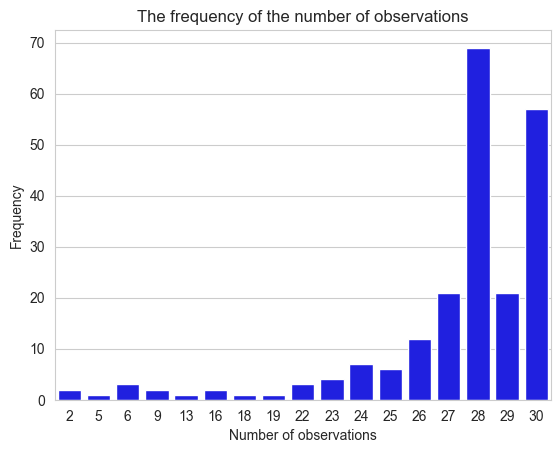

In [37]:
ax = sns.countplot(data=countries_internet.to_frame(), x=0, color='blue')
ax.set(xlabel = 'Number of observations', ylabel='Frequency')
ax.set(title='The frequency of the number of observations')
plt.show()

- The countries that have 20 observations or less are:

In [38]:
few_obs_internet = countries_internet.loc[
    countries_internet <= 20
]

In [39]:
few_obs_internet

Entity
Cayman Islands              19
Tuvalu                      18
Serbia                      16
Montenegro                  16
British Virgin Islands      13
Palau                        9
Nauru                        9
Northern Mariana Islands     6
Turks and Caicos Islands     6
American Samoa               6
South Sudan                  5
Curacao                      2
Kosovo                       2
dtype: int64

- The range of values in the `Internet_Usage` column is between the expected values.
- There is data from the 1990 to 2019.

In [40]:
df_country_internet.describe()

,Year,Internet_Usage
count,5733.000000,5733.000000
mean,2003.899529,21.910492
std,8.371396,28.419759
min,1990.000000,0.000000
25%,1997.000000,0.142546
50%,2004.000000,6.100000
75%,2011.000000,38.500000
max,2019.000000,99.701504


### 6.2 The df_country_people DataFrame

In [41]:
df_country_people.head()

,Entity,Code,Year,Users,Region
0,Afghanistan,AFG,1990,0,South Asia
1,Afghanistan,AFG,1991,0,South Asia
2,Afghanistan,AFG,1992,0,South Asia
3,Afghanistan,AFG,1993,0,South Asia
4,Afghanistan,AFG,1994,0,South Asia


- There are 212 countries in the **df_country_people** DataFrame.

In [42]:
df_country_people['Entity'].nunique()

212

- The frequency of the number of observations for the **df_country_people** DataFrame shows: 
    - In one hand, there are 123 countries that have 30 observations.
    - On the other hand, there are 12 countries that have 20 observations or less.

In [43]:
countries_people = df_country_people.value_counts(subset='Entity')

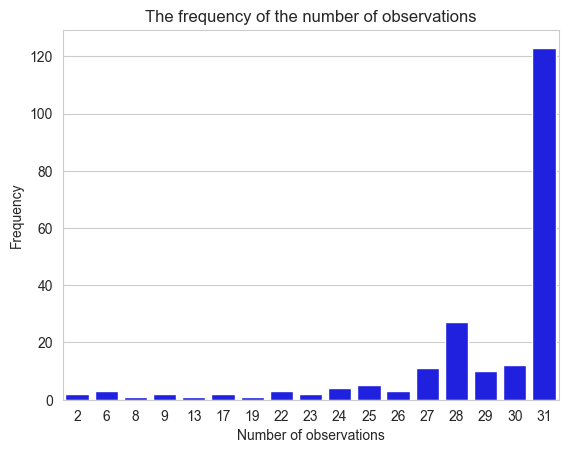

In [44]:
ax = sns.countplot(data=countries_people.to_frame(), x=0, color='blue')
ax.set(xlabel = 'Number of observations', ylabel='Frequency')
ax.set(title='The frequency of the number of observations')
plt.show()

- The countries that have 20 observations o less are:

In [45]:
few_obs_people = countries_people.loc[
    df_country_people.value_counts(subset='Entity') <= 20
]

In [46]:
few_obs_people

Entity
Cayman Islands              19
Serbia                      17
Montenegro                  17
British Virgin Islands      13
Nauru                        9
Palau                        9
South Sudan                  8
Northern Mariana Islands     6
Turks and Caicos Islands     6
American Samoa               6
Kosovo                       2
Curacao                      2
dtype: int64

- There is data from 1990 to 2020.

In [47]:
df_country_people.describe()

,Year,Users
count,6041.000000,6.041000e+03
mean,2004.717431,7.315081e+06
std,8.842146,3.869922e+07
min,1990.000000,0.000000e+00
25%,1997.000000,6.278000e+03
50%,2005.000000,1.766890e+05
75%,2012.000000,2.503836e+06
max,2020.000000,1.003219e+09


### 6.3 The df_country_broadband DataFrame

In [48]:
df_country_broadband.head()

,Entity,Code,Year,Broadband_Subscriptions,Region
0,Afghanistan,AFG,2004,0.000809,South Asia
1,Afghanistan,AFG,2005,0.000858,South Asia
2,Afghanistan,AFG,2006,0.001892,South Asia
3,Afghanistan,AFG,2007,0.001845,South Asia
4,Afghanistan,AFG,2008,0.001804,South Asia


- There are 207 countries in the **df_country_broadband** DataFrame.

In [49]:
df_country_broadband['Entity'].nunique()

207

- The frequency of the number of observations in the **df_country_broadband** DataFrame shows: 
    - In one hand, there are only 9 countries that have 23 observations.
    - On the other hand, there are 12 countries that have 10 observations or less.

In [50]:
countries_broadband = df_country_broadband.value_counts(subset='Entity')

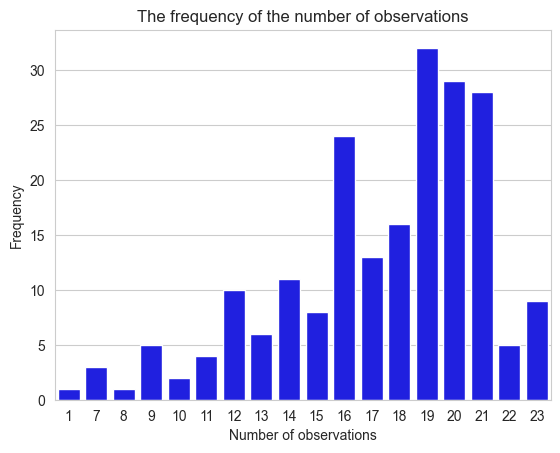

In [51]:
ax = sns.countplot(data=countries_broadband.to_frame(), x=0, color='blue')
ax.set(xlabel = 'Number of observations', ylabel='Frequency')
ax.set(title='The frequency of the number of observations')
plt.show()

- The countries that have 10 observations or less are:

In [52]:
few_obs_broadband = countries_broadband.loc[
    countries_broadband <= 10
]

In [53]:
few_obs_broadband

Entity
South Sudan                     10
Curacao                         10
United States Virgin Islands     9
Guam                             9
Haiti                            9
Iraq                             9
Democratic Republic of Congo     9
Somalia                          8
Congo                            7
Central African Republic         7
Marshall Islands                 7
Nauru                            1
dtype: int64

- The range of values in the `Broadband_Subscriptions` column is between the expected values.
- There is data from 1998 to 2020.

In [54]:
df_country_broadband.describe()

,Year,Broadband_Subscriptions
count,3597.000000,3597.000000
mean,2011.149847,10.171124
std,5.599495,12.758685
min,1998.000000,0.000000
25%,2007.000000,0.251217
50%,2011.000000,3.603798
75%,2016.000000,17.926935
max,2020.000000,78.524361


## Q.1 What are the top 5 countries with the highest internet use (by population share)?

In [55]:
sort_countries_internet = df_country_internet.sort_values(
    by=['Year', 'Internet_Usage'], ascending=False
)

In [56]:
top5_countries_2019 = df_country_internet.loc[
    df_country_internet['Year'] == 2019,
    ['Entity', 'Internet_Usage', 'Region']
].nlargest(n=5, columns='Internet_Usage')

- The next table shows the top 5 countries with the highest share of population using the internet in 2019 (the most recent year in the df_country_internet DataFrame):

In [57]:
top5_countries_2019

,Entity,Internet_Usage,Region
387,Bahrain,99.701504,Africa Western and Central
4256,Qatar,99.652804,Africa Western and Central
2794,Kuwait,99.542676,Africa Western and Central
5416,United Arab Emirates,99.149998,Africa Western and Central
1411,Denmark,98.046435,European Union


- **The top 5 with the highest share of population using the internet in 2019 are:**
    1. **Bahrain**
    2. **Qatar**
    3. **Kuwait**
    4. **United Arab Emirates**
    5. **Denmark**

## Q.2 How many people had internet access in those countries in 2019?

In [58]:
top5_countries_2019['Entity'].tolist()

['Bahrain', 'Qatar', 'Kuwait', 'United Arab Emirates', 'Denmark']

In [59]:
top5_countries_internet = df_country_people.loc[
    (df_country_people['Entity'].isin(top5_countries_2019['Entity'].tolist())) &
    (df_country_people['Year'] == 2019),
    ['Entity', 'Users']
].sort_values(by='Users', ascending=False)

In [60]:
# Create a new column with the number of user in milions
top5_countries_internet = top5_countries_internet.assign(
    users_millions = lambda x: x['Users'] / 1000000
)

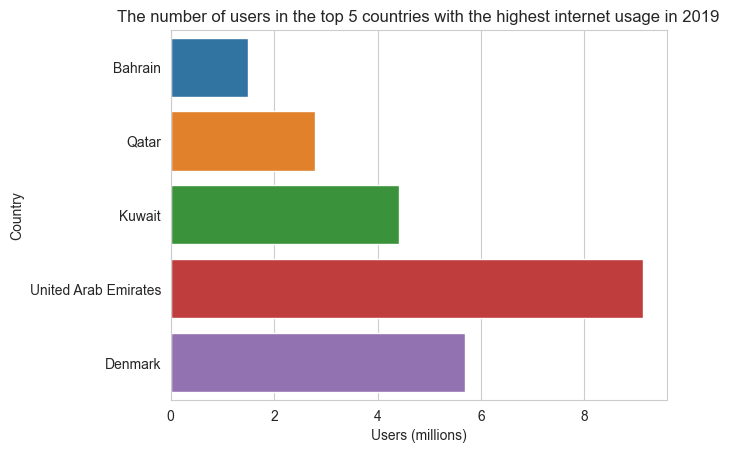

In [61]:
ax = sns.barplot(data=top5_countries_internet, y='Entity', x='users_millions',
                order=['Bahrain', 'Qatar', 'Kuwait', 'United Arab Emirates', 'Denmark'])
ax.set(ylabel='Country', xlabel='Users (millions)')
ax.set(title='The number of users in the top 5 countries with the highest internet usage in 2019')
plt.show()

- **The number of users in the top 5 countries with the highest  internet usage in 2019 are:**
    - **United Arab Emirates: 9,133,361 users**
    - **Denmark: 5,682,653 users**
    - **Kuwait: 4,420,795 users**
    - **Qatar: 2,797,495 users**
    - **Bahrain: 1,489,735 users**

## Q.3 What are the top 5 countries with the highest internet use for each of the following regions: 'Africa Eastern and Southern', 'Africa Western and Central', 'Latin America & Caribbean', 'East Asia & Pacific', 'South Asia', 'North America', 'European Union'?

In [62]:
# It drop duplicates from the 'Etntity' column and the extracts only the first 5 rows
def no_duplicates(df):
    return df.drop_duplicates(subset='Entity').head()

In [63]:
# First, the df_country_internet is sorted by 'Region', 'Year' and 'Internet_Usage' in descending
sort_regions = df_country_internet.sort_values(by=['Region', 'Year', 'Internet_Usage'], ascending=False)

# A GroupBy object is created, and then the function "no_duplicates" is applied to every row
top5_regions = sort_regions.groupby('Region').apply(no_duplicates)

In [64]:
# The column 'Entity' is set to the index to create a MultiIndex
top5_regions = top5_regions.set_index('Entity', append=True).reset_index(level=1, drop=True)

- The top 5 countries with the highest internet use for each region are:
    - For some regions, there is only a few countries that have information for the latest year (2019). In those cases, the top 5 is filled with information from years before. 
    - The table is sorted from highest to lowest internet usage for each region.
    - The North America region only have 3 countries listed (top 3 for this region).

In [65]:
top5_regions[['Year', 'Internet_Usage']].sort_values(
    by=['Region', 'Internet_Usage'], ascending=[True, False]
)

Year  Internet_Usage
Region                      Entity                                    
Africa Eastern and Southern Mauritius             2019       63.999898
                            Seychelles            2017       58.769811
                            Cape Verde            2017       57.162146
                            Kenya                 2019       22.565119
                            Guinea                2018       21.830023
Africa Western and Central  Bahrain               2019       99.701504
                            Qatar                 2019       99.652804
                            Kuwait                2019       99.542676
                            United Arab Emirates  2019       99.149998
                            Saudi Arabia          2019       95.724736
East Asia & Pacific         South Korea           2019       96.157583
                            Brunei                2019       95.000000
                            Hong Kong             2019       91.743400
                            Singapore             2019       88.949253
                            Macao                 2019       86.467926
European Union              Denmark               2019       98.046435
                            Norway                2019       98.000004
                            Sweden                2019       94.493443
                            Netherlands           2019       93.288591
                            Switzerland           2019       93.146087
Latin America & Caribbean   Costa Rica            2019       81.202596
                            Uruguay               2019       76.949552
                            Puerto Rico           2019       70.874321
                            Mexico                2019       70.069910
                            Paraguay              2019       68.517628
North America               Bermuda               2017       98.370000
                            Canada                2017       92.701372
                            United States         2018       88.498903
South Asia                  Maldives              2017       63.185666
                            Sri Lanka             2017       34.113348
                            India                 2017       32.000000
                            Nepal                 2017       21.403510
                            Pakistan              2019       17.070902

## Q.4 Create a visualization for those seven regions' internet usage over time.

- The next figure shows the internet usage over time by regions.

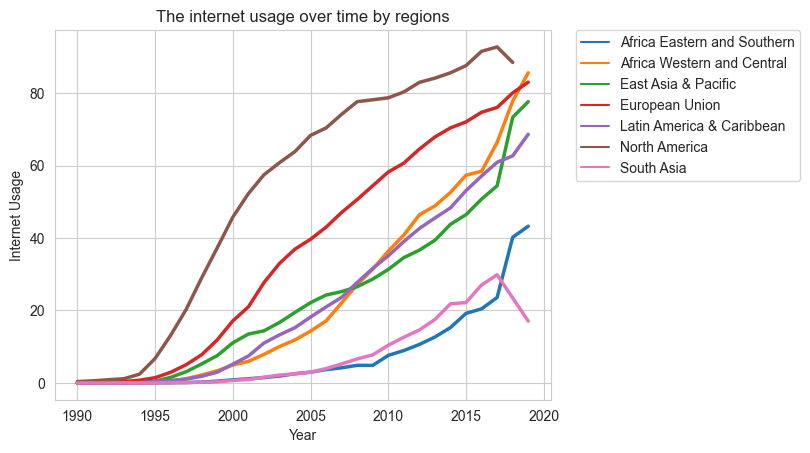

In [66]:
ax = sns.lineplot(data=df_country_internet, x='Year', y='Internet_Usage', hue='Region', ci=None, linewidth=2.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax.set(ylabel='Internet Usage')
ax.set(title='The internet usage over time by regions')
plt.show()

- Now the **top5_regions** DataFrame is used to get the countries that are in the top 5 for each region

In [67]:
# Extracts in a list the codes from the top5_regions DataFrame
code_top5 = top5_regions['Code'].to_list()

In [68]:
top5_regions_countries = df_country_internet.loc[
    df_country_internet['Code'].isin(code_top5)
]

- The next DataFrames are created to get the top 5 countries for each region.

In [69]:
top5_africa_eastern_region = top5_regions_countries.loc[
    top5_regions_countries['Region'] == 'Africa Eastern and Southern'
]

In [70]:
top5_africa_western_region = top5_regions_countries.loc[
    top5_regions_countries['Region'] == 'Africa Western and Central'
]

In [71]:
top5_east_asia_region = top5_regions_countries.loc[
    top5_regions_countries['Region'] == 'East Asia & Pacific'
]

In [72]:
top5_european_region = top5_regions_countries.loc[
    top5_regions_countries['Region'] == 'European Union'
]

In [73]:
top5_latin_america_region = top5_regions_countries.loc[
    top5_regions_countries['Region'] == 'Latin America & Caribbean'
]

In [74]:
top5_north_america_region = top5_regions_countries.loc[
    top5_regions_countries['Region'] == 'North America'
]

In [75]:
top5_south_asia_region = top5_regions_countries.loc[
    top5_regions_countries['Region'] == 'South Asia'
]

- The next figures show the internet usage overtime for every region:

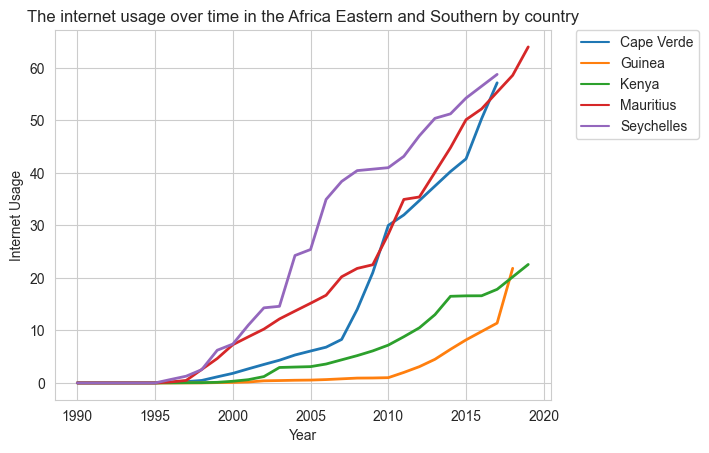

In [76]:
ax = sns.lineplot(data=top5_africa_eastern_region, x='Year', y='Internet_Usage', hue='Entity', linewidth=2)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax.set(ylabel='Internet Usage')
ax.set(title='The internet usage over time in the Africa Eastern and Southern by country')
plt.show()

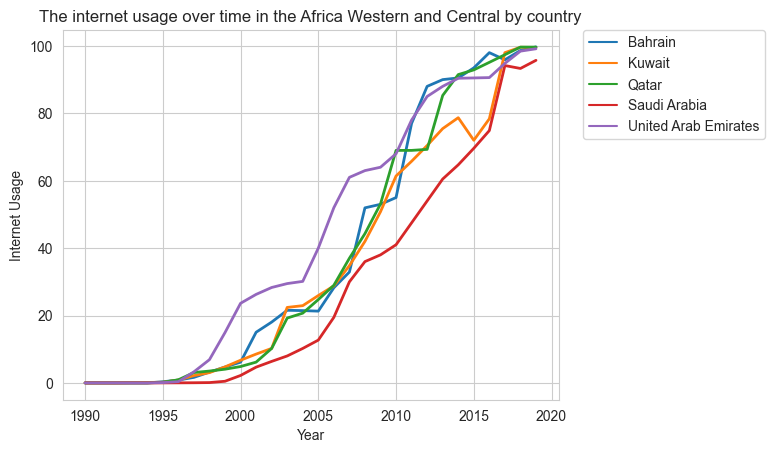

In [77]:
ax = sns.lineplot(data=top5_africa_western_region, x='Year', y='Internet_Usage', hue='Entity', linewidth=2)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax.set(ylabel='Internet Usage')
ax.set(title='The internet usage over time in the Africa Western and Central by country')
plt.show()

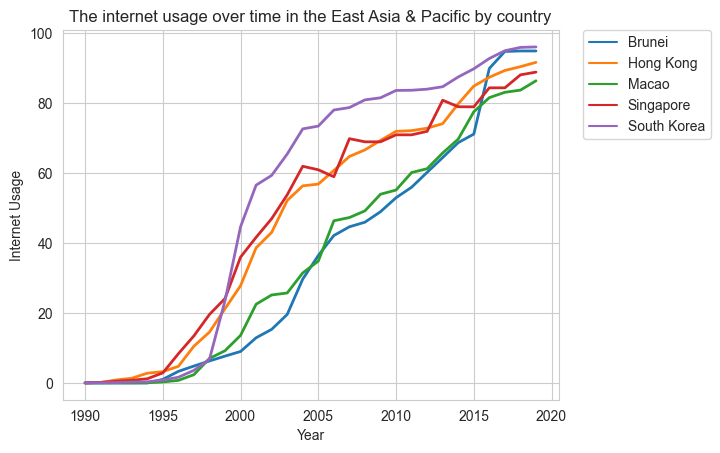

In [78]:
ax = sns.lineplot(data=top5_east_asia_region, x='Year', y='Internet_Usage', hue='Entity', linewidth=2)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax.set(ylabel='Internet Usage')
ax.set(title='The internet usage over time in the East Asia & Pacific by country')
plt.show()

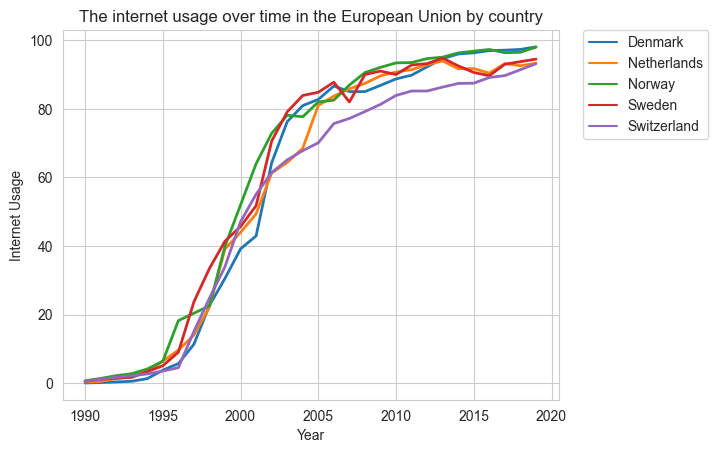

In [79]:
ax = sns.lineplot(data=top5_european_region, x='Year', y='Internet_Usage', hue='Entity', linewidth=2)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax.set(ylabel='Internet Usage')
ax.set(title='The internet usage over time in the European Union by country')
plt.show()

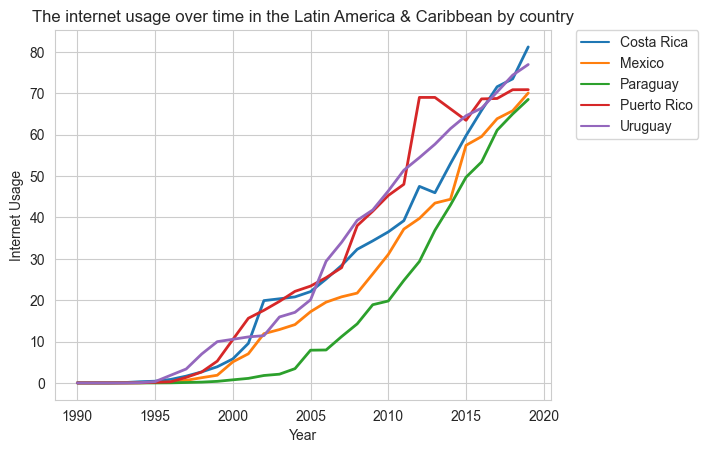

In [80]:
ax = sns.lineplot(data=top5_latin_america_region, x='Year', y='Internet_Usage', hue='Entity', linewidth=2)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax.set(ylabel='Internet Usage')
ax.set(title='The internet usage over time in the Latin America & Caribbean by country')
plt.show()

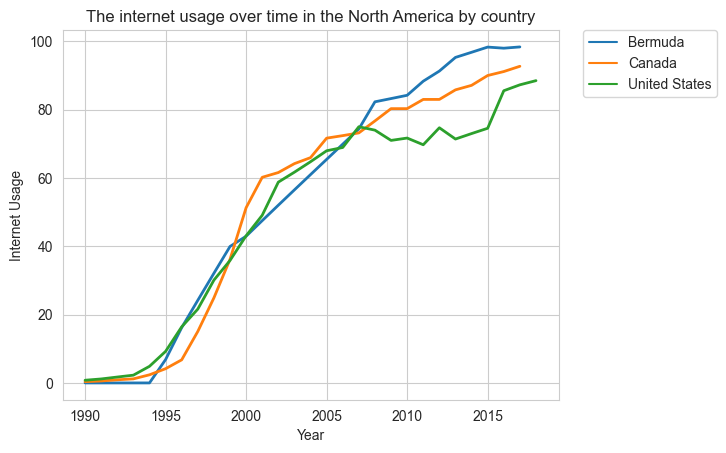

In [81]:
ax = sns.lineplot(data=top5_north_america_region, x='Year', y='Internet_Usage', hue='Entity', linewidth=2)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax.set(ylabel='Internet Usage')
ax.set(title='The internet usage over time in the North America by country')
plt.show()

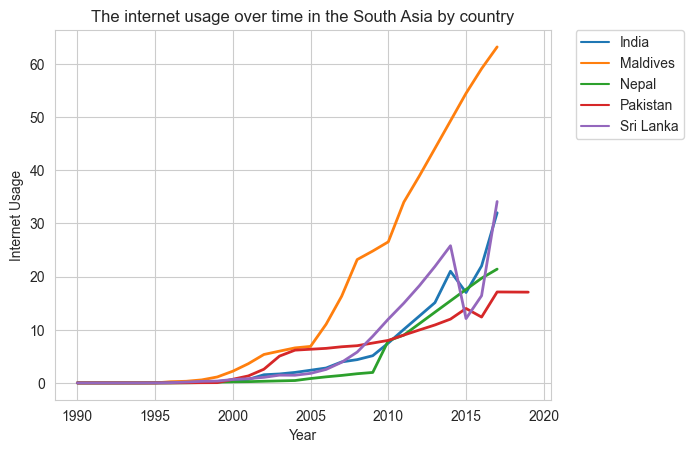

In [82]:
ax = sns.lineplot(data=top5_south_asia_region, x='Year', y='Internet_Usage', hue='Entity', linewidth=2)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax.set(ylabel='Internet Usage')
ax.set(title='The internet usage over time in the South Asia by country')
plt.show()

## Q.5 What are the 5 countries with the most internet users?

In [83]:
sort_countries_people = df_country_people.sort_values(
    by=['Year', 'Users'], ascending=False
)

In [84]:
top5_countries_users = sort_countries_people.drop_duplicates('Entity').nlargest(n=5, columns='Users')
top5_countries_users = top5_countries_users.assign(
    Users_millions = lambda x: x['Users'] / 1000000
)

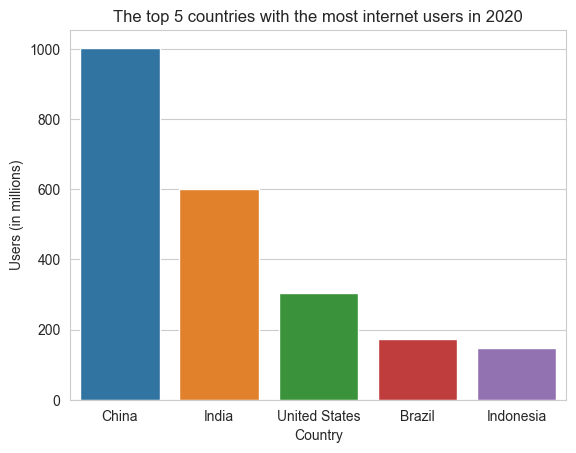

In [85]:
ax = sns.barplot(data=top5_countries_users, x='Entity', y='Users_millions')
ax.set(xlabel='Country', ylabel='Users (in millions)')
ax.set(title='The top 5 countries with the most internet users in 2020')
plt.show()

- **The top 5 countries with the most internet users in 2020 are:**
    1. **China: 1,003,218,650 users**
    2. **India: 600,446,441 users**
    3. **United States: 305,371,298 users**
    4. **Brazil: 173,419,624 users**
    5. **Indonesia: 146,059,763 users**

## Q.6 What is the correlation between internet usage (population share) and broadband subscriptions for 2019?

In [86]:
df_internet_broadband = df_country_internet.merge(df_country_broadband, how='inner', on=['Entity', 'Year'])
df_internet_broadband = df_internet_broadband.loc[
    df_internet_broadband['Year'] == 2019,
    ['Internet_Usage', 'Broadband_Subscriptions']
]

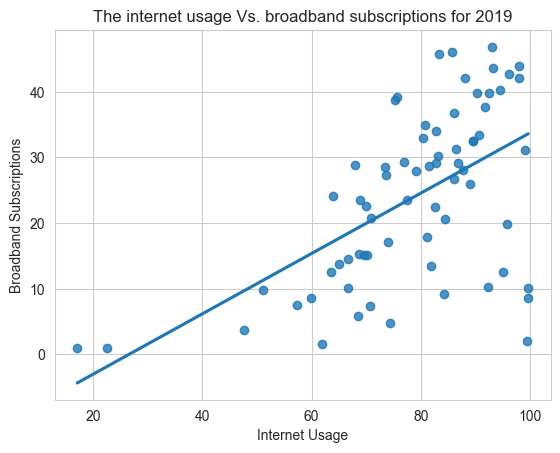

In [87]:
ax = sns.regplot(data=df_internet_broadband, 
            x='Internet_Usage', y='Broadband_Subscriptions', ci=None)
ax.set(xlabel='Internet Usage', ylabel='Broadband Subscriptions')
ax.set(title='The internet usage Vs. broadband subscriptions for 2019')
plt.show()

- There is a positive correlation between internet usage and broadband. 
- **The correlation between internet usage and broadband is 0.56**.

In [88]:
df_internet_broadband.corr()

,Internet_Usage,Broadband_Subscriptions
Internet_Usage,1.000000,0.557518
Broadband_Subscriptions,0.557518,1.000000


## Summarize findings

- Bahrain is the country with the highest share of population using the internet (99.7%) in 2019.
- Between the top 5 countries with the highest internet usage in 2019:
    - 4 of 5 countries are from the Africa Western and  Central region.
    - Denmark is the only country from the European Union.    
- United Arab Emirates is the country with the highest number of users (9,133,361 users) in the top 5 countries with the highest internet usage in 2019.
- Even though Bahrain is the top 1 country with the highest internet usage in 2019, it has the lowest number of users (1,489,735 users) between the top 5 countries with the highest internet usage in 2019.
- The overall users in the top 5 countries with the highest internet usage in 2019 are 23,524,039.
- The internet usage over time by regions figure shows that all regions have a growth in the internet usage over time, but North America and South Asia region.
    - In the region of North America, United States seems to be the country that makes the mean of the region go down. It has negative percent of growth in 2009 (-4.05%), 2011 (-2.7%) and 2013 (-4.4%).
    - In the region of South Asia, Sri Lanka has massive negative growth in 2014 (-53.1%).
- China is the country with the highest number of users (1,003,218,650 users).
- There is a positive correlation between the internet usage and broadband subscriptions (0.56) for 2019.

**Author: Eduardo Oliva Sandoval**

LinkedIn: https://www.linkedin.com/in/edolivasan/

Github: https://github.com/edolivasan